## Terner Assessment

### Libraries, settings

In [1]:
import seaborn as sns
import statistics as stats
from shapely.geometry import Point
import branca.colormap as cm
from census import Census
import pandas as pd
import geopandas as gpd
import numpy as np
import folium
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 80)
pd.options.display.float_format = '{:.2f}'.format

### Section A

*1. Find the San Jose Parcels in Urban Village, Mixed Use Commercial, Urban Residential, and Transit Residential zones (zoning codes here). How many Parcels are there in each of these zones?*
- *Join the zoning geometries to the parcel geometries to find which zone the parcel falls into*

In [6]:
# parcels
parcels = gpd.read_file(r'data\Parcels.geojson')
parcels.to_crs('4326', inplace = True)

# zoning
zones = gpd.read_file(r'data\Zoning_Districts.geojson')
zones.to_crs('4326', inplace = True)

In [7]:
parcels.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224908 entries, 0 to 224907
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   OBJECTID      224908 non-null  int32              
 1   PARCELID      224908 non-null  object             
 2   INTID         224908 non-null  int32              
 3   APN           224899 non-null  object             
 4   LOTNUM        191943 non-null  object             
 5   PARCELTYPE    224908 non-null  object             
 6   FEATURECLASS  224908 non-null  object             
 7   PLANCRT       224908 non-null  object             
 8   PLANMOD       10318 non-null   object             
 9   LASTUPDATE    224908 non-null  datetime64[ms, UTC]
 10  NOTES         17334 non-null   object             
 11  COVERED       3428 non-null    object             
 12  SHAPE_Length  224908 non-null  float64            
 13  SHAPE_Area    224908 non-null  float

In [8]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   OBJECTID       13512 non-null  int32              
 1   FACILITYID     13512 non-null  object             
 2   INTID          13512 non-null  int32              
 3   ZONING         13511 non-null  object             
 4   ZONINGABBREV   13511 non-null  object             
 5   REZONINGFILE   6773 non-null   object             
 6   PDUSE          3900 non-null   object             
 7   PDDENSITY      12889 non-null  object             
 8   DEVELOPEDASPD  3855 non-null   object             
 9   APPROVALDATE   2268 non-null   object             
 10  COLORCODE      13511 non-null  object             
 11  LASTUPDATE     13512 non-null  datetime64[ms, UTC]
 12  NOTES          766 non-null    object             
 13  SHAPE_Length   13512 non-null  float64

In [9]:
# parcel and zoning join, includes duplicates due to overlapping
joined_gdf = gpd.sjoin(parcels, zones[["ZONING","geometry"]], how="left", predicate="intersects")

In [10]:
joined_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 283981 entries, 0 to 224907
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   OBJECTID      283981 non-null  int32              
 1   PARCELID      283981 non-null  object             
 2   INTID         283981 non-null  int32              
 3   APN           283965 non-null  object             
 4   LOTNUM        232597 non-null  object             
 5   PARCELTYPE    283981 non-null  object             
 6   FEATURECLASS  283981 non-null  object             
 7   PLANCRT       283981 non-null  object             
 8   PLANMOD       16032 non-null   object             
 9   LASTUPDATE    283981 non-null  datetime64[ms, UTC]
 10  NOTES         26601 non-null   object             
 11  COVERED       3905 non-null    object             
 12  SHAPE_Length  283981 non-null  float64            
 13  SHAPE_Area    283981 non-null  float64   

- *Note that some parcels may overlap with more than one zone. We suggest you write a custom function in a separate .py file that returns only one overlapping zone per parcel*

In [12]:
import importlib
import fn_overlap  

importlib.reload(fn_overlap)

final_join = fn_overlap.overlap(parcels, zones, joined_gdf)

In [13]:
final_join.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 224908 entries, 0 to 224907
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   OBJECTID      224908 non-null  int32              
 1   PARCELID      224908 non-null  object             
 2   INTID         224908 non-null  int32              
 3   APN           224899 non-null  object             
 4   LOTNUM        191943 non-null  object             
 5   PARCELTYPE    224908 non-null  object             
 6   FEATURECLASS  224908 non-null  object             
 7   PLANCRT       224908 non-null  object             
 8   PLANMOD       10318 non-null   object             
 9   LASTUPDATE    224908 non-null  datetime64[ms, UTC]
 10  NOTES         17334 non-null   object             
 11  COVERED       3428 non-null    object             
 12  SHAPE_Length  224908 non-null  float64            
 13  SHAPE_Area    224908 non-null  float

- *Determine how many parcels are in each zone*

In [15]:
final_join["ZONING_final"].value_counts()

ZONING_final
R-1-8        111406
A(PD)         41584
R-1-8(PD)     12495
R-1-5         11545
R-2            8850
R-M            4425
R-1-5(PD)      2235
R-1-8(CL)      1825
CP             1712
MUN            1661
R-M(PD)        1582
R-M(CL)        1483
UR             1398
R-2(PD)        1115
LI             1083
OS             1054
IP             1023
R-1-1(PD)      1011
DC              949
HI              877
IP(PD)          795
PQP             737
A               619
CG              499
MUC             494
CN              444
CO              403
CP(PD)          355
R-1-2           331
CIC             318
UV              314
R-1-2(PD)       308
R-1-5(CL)       237
TR              191
R-1-1           185
UVC             110
DC(PD)          104
MS-G             97
R-MH             85
TEC              79
R-1-RR           61
CG(PD)           48
LI(PD)           43
WATER            26
MS-C             24
CIC(PD)          22
DC-NT1           19
CN(PD)           19
PQP(PD)          14
HI(PD) 

- *2. Calculate the total acreage across all parcels in each zone. Which zone, Urban Village or Urban Residential has the highest possible number of dwelling units based solely on the maximum dwelling unit per acre (du/ac) allowance for 100% residential development?*

In [17]:
acres_per_zone = (final_join.dropna(subset=["ZONING_final", "SHAPE_Area"])
                  .groupby("ZONING_final")["SHAPE_Area"]
                  .sum()/43560).round(2).reset_index(name="total_acres").sort_values("total_acres", ascending=False)
acres_per_zone

,ZONING_final,total_acres
1,A(PD),21986.77
37,R-1-8,20959.72
0,A,15639.06
26,OS,14824.41
28,PQP,3997.91
17,IP,3697.70
31,R-1-1(PD),3596.45
34,R-1-5,3070.53
15,HI,2483.14
54,WATER,2357.80


In [18]:
# max DU/AC for Urban Village / Urban Residential, from SJ Municipal Code, table 20-136
# https://library.municode.com/ca/san_jose/codes/code_of_ordinances?nodeId=TIT20ZO_CH20.55URVIMIUSZODI
uv = 250 
ur = 95

uv_ur = acres_per_zone[acres_per_zone["ZONING_final"].isin(["UR", "UV"])].copy()

# assign max DU/AC based on zoning designation
uv_ur["max_DU/AC"] = uv_ur["ZONING_final"].map({"UV": uv, "UR": ur})

# calculate max potential dwelling units
uv_ur["max_units"] = uv_ur["total_acres"] * uv_ur["max_DU/AC"]

uv_ur

,ZONING_final,total_acres,max_DU/AC,max_units
50,UR,510.37,95,48485.15
52,UV,200.56,250,50140.00


Answer: Urban Village has the highest possible number of dwelling units for 100% residential, at approx. 50k units (vs. 48.5k UR units).

- *3. Calculate the number of Urban Village parcels within a mile of the San Jose Diridon Station.*

In [21]:
# SJ Diridion Station coords
station = gpd.GeoDataFrame(geometry=[Point(-121.90303088944698, 37.329831015370054)],crs="EPSG:4326")

# Reproject both to a metric CRS
area_crs = final_join.estimate_utm_crs()
station_m = station.to_crs(area_crs)
parcels_m = final_join.to_crs(area_crs)

# Make a 1-mile buffer (1 mile ≈ 1609.34 meters)
buffer_1mile = station_m.buffer(1609.34).iloc[0]

# Filter Urban Village parcels within that buffer
uv_within_mile = parcels_m[(parcels_m["ZONING_final"] == "UV") & (parcels_m.intersects(buffer_1mile))]

print("Urban Village parcels within 1 mile:", uv_within_mile.shape[0])

Urban Village parcels within 1 mile: 73


- *4. Choose two or three census characteristics related to evaluating aspects of opportunity, economic mobility, or environmental sustainability near transit stations that might inform policy design. Provide a 1-2 paragraph summary and at least one visualization that you think a San Jose government official might want to see to better understand the characteristics of the area within two miles of Diridon Station. As indicated in the data section above you can use whatever source of census data you are most comfortable with. You may need to perform a geographic crosswalk here, which you may do however you wish.*

In [23]:
# Pull ACS 5-year data for commuting habits and gross rent as a percentage of household income (GRAPI). 

# API key
c = Census("de92d4cda8041d0e1c379c0492146f00df5b1179")

# pull ACS 5-year data
data = pd.DataFrame(c.acs5.state_county_tract(
    ('B08301_001E', # all commuters
     'B08301_010E', # transit commuters 
     'B25070_001E', # all renter households
     'B25070_007E', # 30.0 to 34.9 percent
     'B25070_008E', # 35.0 to 39.9 percent
     'B25070_009E', # 40.0 to 49.9 percent
     'B25070_010E', # 50.0 percent or more
    ),
    '06','085','*', year=2023)
)

# load tract geometries
tracts = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2022/TRACT/tl_2022_06_tract.zip")

# subset to Santa Clara (county FIPS 085)
tracts = tracts[tracts["COUNTYFP"]=="085"]

In [24]:
# build rent_burdened_hhs, drop component bins
data = data.copy()
data["rent_burdened_hhs"] = (data["B25070_007E"] + data["B25070_008E"] + data["B25070_009E"] + data["B25070_010E"])
data_drop = data.drop(columns=["B25070_007E","B25070_008E","B25070_009E","B25070_010E"])

# rename and index by tract
data_clean = (data_drop.rename(columns={"B08301_001E": "all_commuters","B08301_010E": "transit_commuters","B25070_001E": "renter_hhs"}).set_index("tract"))

# tracts indexed by tract
tracts_clean = tracts.rename(columns={"TRACTCE": "tract"}).set_index("tract")

# join and keep desired columns
combined_df = tracts_clean.join(data_clean, how="left")
combined_df_trim = combined_df[["all_commuters","transit_commuters","rent_burdened_hhs","renter_hhs","geometry"]].copy()

# add transit_share and rent burden share
combined_df_trim["transit_share"] = (combined_df_trim["transit_commuters"] / combined_df_trim["all_commuters"]) * 100
combined_df_trim['rent_burden_share'] = (combined_df_trim["rent_burdened_hhs"] / combined_df_trim["renter_hhs"]) * 100

combined_df_trim.head()

,all_commuters,transit_commuters,rent_burdened_hhs,renter_hhs,geometry,transit_share,rent_burden_share
tract,,,,,,,
503111,2392.00,16.00,212.00,420.00,POLYGON ((-121.8...,0.67,50.48
503112,1880.00,65.00,665.00,1061.00,POLYGON ((-121.8...,3.46,62.68
506302,3784.00,2.00,382.00,1364.00,POLYGON ((-121.9...,0.05,28.01
511200,2380.00,23.00,172.00,514.00,POLYGON ((-122.1...,0.97,33.46
509801,3019.00,70.00,493.00,1102.00,POLYGON ((-122.1...,2.32,44.74


In [25]:
# convert to gdf to conduct spatial analysis
combined_gdf = gpd.GeoDataFrame(combined_df_trim, geometry="geometry", crs="EPSG:4326")

# reproject 
area_crs = combined_gdf.estimate_utm_crs()
tracts_m = combined_gdf.to_crs(area_crs)
station_m = station.to_crs(area_crs)

# 2 mile buffer (in meters: 1609.34 * 2)
buffer_2mi = station_m.buffer(1609.34 * 2).iloc[0]

# boolean column - does tract geometry intersect buffer? 
combined_gdf = combined_gdf.copy() 
combined_gdf["within_2mi"] = tracts_m.intersects(buffer_2mi) # Note: using .within() also viable but risks excluding key tracts near the buffer boundary.

combined_gdf.head()

,all_commuters,transit_commuters,rent_burdened_hhs,renter_hhs,geometry,transit_share,rent_burden_share,within_2mi
tract,,,,,,,,
503111,2392.00,16.00,212.00,420.00,POLYGON ((-121.8...,0.67,50.48,False
503112,1880.00,65.00,665.00,1061.00,POLYGON ((-121.8...,3.46,62.68,True
506302,3784.00,2.00,382.00,1364.00,POLYGON ((-121.9...,0.05,28.01,False
511200,2380.00,23.00,172.00,514.00,POLYGON ((-122.1...,0.97,33.46,False
509801,3019.00,70.00,493.00,1102.00,POLYGON ((-122.1...,2.32,44.74,False


#### Visualization #1 — Histograms with Mean Values of Transit Share and Rent Burden, by Distance from Station


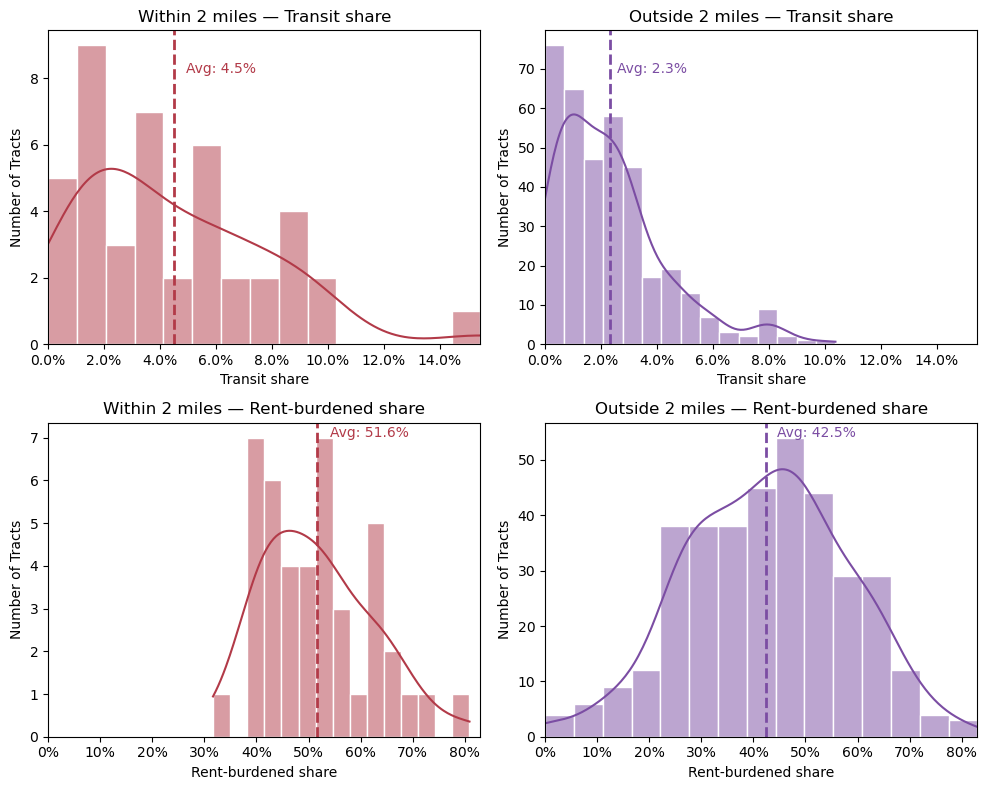

In [27]:
# prep: tidy labels and drop NaNs in transit_share
gdf = combined_gdf.copy()
gdf["within_2mi"] = gdf["within_2mi"].map({True: "Within 2 miles", False: "Outside 2 miles"})
gdf = gdf.dropna(subset=["transit_share"])

# colors for each panel
colors = {"Within 2 miles": "#B23A48", "Outside 2 miles": "#7B4DA3"}

# compute means per group (for vlines/labels)
means_transit = gdf.groupby("within_2mi")["transit_share"].mean()
means_rent = gdf.groupby("within_2mi")["rent_burden_share"].mean()

# match x-axes
xlim_transit = (gdf["transit_share"].min(), gdf["transit_share"].max())
xlim_rent    = (gdf["rent_burden_share"].min(), gdf["rent_burden_share"].max())

# create figure
fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)

# top: transit share 
for ax, label in zip(axes[0], ["Within 2 miles", "Outside 2 miles"]):
    sub = gdf[gdf["within_2mi"] == label]
    color = colors[label]
    
    sns.histplot(
        data=sub,
        x="transit_share",
        bins=15,
        element="bars",
        kde=True,
        color=color,
        edgecolor="white",
        ax=ax
    )
    
    m = means_transit[label]
    ax.axvline(m, linestyle="--", color=color, linewidth=2)
    y_top = ax.get_ylim()[1]
    ax.xaxis.set_major_formatter(PercentFormatter(100))
    ax.text(m * 1.1, y_top * 0.9, f"Avg: {m:.1f}%", color=color, va="top")
    
    ax.set_title(f"{label} — Transit share")
    ax.set_xlabel("Transit share")
    ax.set_ylabel("Number of Tracts")
    ax.set_xlim(xlim_transit)

# bottom: rent-burdened share 
for ax, label in zip(axes[1], ["Within 2 miles", "Outside 2 miles"]):
    sub = gdf[gdf["within_2mi"] == label].dropna(subset=["rent_burden_share"])  # ensure data present
    color = colors[label]
    
    sns.histplot(
        data=sub,
        x="rent_burden_share",
        bins=15,
        element="bars",
        kde=True,
        color=color,
        edgecolor="white",
        ax=ax
    )
    
    m = means_rent[label]
    ax.axvline(m, linestyle="--", color=color, linewidth=2)
    y_top = ax.get_ylim()[1]
    ax.xaxis.set_major_formatter(PercentFormatter(100))
    ax.text(m * 1.05, y_top * .99, f"Avg: {m:.1f}%", color=color, va="top")
    
    ax.set_title(f"{label} — Rent-burdened share")
    ax.set_xlabel("Rent-burdened share")
    ax.set_ylabel("Number of Tracts")
    ax.set_xlim(xlim_rent)

#plt.tight_layout(h_pad=2.0, w_pad=1.0)
#plt.savefig("viz_hist.png", dpi=150)
#plt.close()

plt.tight_layout()
plt.show()

#### Visualization #2.1 - Mapping Transit Share

In [58]:
commute_gdf = gpd.GeoDataFrame(combined_gdf, geometry="geometry", crs="EPSG:4326")

colormap = cm.LinearColormap(colors=["green", "yellow", "red"], vmin=0, vmax=commute_gdf.transit_share.max())
colormap.caption = "Transit Share"

# map centered on extent
minx, miny, maxx, maxy = commute_gdf.total_bounds
center = [37.329831015370054, -121.90303088944698]
m = folium.Map(location=center, zoom_start=12, tiles="CartoDB positron")

# tracts shaded by transit_share
folium.GeoJson(
    commute_gdf,
    name="Transit Share",
    style_function=lambda f: {
        "color": "#555555",          # thin grey stroke
        "weight": 0.5,
        "fillOpacity": 0.7,
        "fillColor": colormap(f["properties"]["transit_share"]),
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["transit_share"],
        aliases=["Transit share"],
        localize=True
    ),
).add_to(m)

# tracts within 2 miles - outline
folium.GeoJson(
    commute_gdf[commute_gdf["within_2mi"]],
    name="Within 2 miles (outline)",
    style_function=lambda f: {
        "color": "black",
        "weight": 2.5,
        "fillOpacity": 0,          
        "dashArray": "6,6",       
    }
).add_to(m)

# station
folium.CircleMarker(
    location=center,  
    radius=8,                
    color="black",           
    weight=1,               
    fill=True,             
    fill_color="gray",       
    fill_opacity=0.8,        
    popup="Diridon Station" 
).add_to(m)

# legend + controls
colormap.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)
#m.save("commute_map.html")
#m # Note: turned off to reduce file size 

#### Visualization #2.2 - Mapping Rent Burden

In [62]:
burden_gdf = gpd.GeoDataFrame(combined_gdf, geometry="geometry", crs="EPSG:4326")

colormap = cm.LinearColormap(colors=["green", "yellow", "red"], vmin=0, vmax=burden_gdf.rent_burden_share.max())
colormap.caption = "Rent Burden Share"

# map centered on extent
minx, miny, maxx, maxy = burden_gdf.total_bounds
center = [37.329831015370054, -121.90303088944698]
m = folium.Map(location=center, zoom_start=12, tiles="CartoDB positron")

# tracts shaded by rent_burden_share
folium.GeoJson(
    burden_gdf,
    name="Rent Burden Share",
    style_function=lambda f: {
        "color": "#555555",          # thin grey stroke
        "weight": 0.5,
        "fillOpacity": 0.7,
        "fillColor": colormap(f["properties"]["rent_burden_share"]),
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["rent_burden_share"],
        aliases=["Rent burden share"],
        localize=True
    ),
).add_to(m)

# tracts within 2 miles - outline
folium.GeoJson(
    burden_gdf[burden_gdf["within_2mi"]],
    name="Within 2 miles (outline)",
    style_function=lambda f: {
        "color": "black",
        "weight": 2.5,
        "fillOpacity": 0,          
        "dashArray": "6,6",       
    }
).add_to(m)

# station
folium.CircleMarker(
    location=center,  
    radius=8,                
    color="black",           
    weight=1,               
    fill=True,             
    fill_color="gray",       
    fill_opacity=0.8,        
    popup="Diridon Station" 
).add_to(m)

# legend + controls
colormap.add_to(m)
folium.LayerControl(collapsed=False).add_to(m)
#m.save("rentburden_map.html")
#m # Note: turned off to reduce file size 

#### Summary
Two characteristics stand out as particularly relevant near Diridon Station: commuting habits and rent burden. Commuting data shows that tracts within a two-mile radius of the station rely on public transit at roughly twice the rate of those farther away (4.5% vs. 2.3%). While overall percentages remain low and highlight the need for stronger strategies to grow ridership, the higher usage near the station also means that more people in this area stand to benefit directly from investments in transit improvements.

At the same time, rent burden data (measured as the share of households spending 30% or more of income on housing) highlights a clear affordability challenge. Renter households within the two-mile area experience, on average, a rent burden rate about 9% higher than those outside it (51.6% vs 42.5%). This suggests that policies designed to increase transit use - such as improved service, last-mile connections, or affordable housing tied to transit access - could deliver greater benefits here, since households struggling with high housing costs are also more sensitive to the high expense of car ownership. Together, these two indicators point toward an opportunity for targeted, transit-oriented affordability policies near Diridon Station.

### Section B

The purpose of this project is to show how I approached the problem of overlapping parcels and to emphasize that I try to confirm outputs against the logic of the data rather than just accepting them as-is. My working assumption was that most overlaps were boundary artifacts, and that selecting the dominant polygon area would provide a policy-appropriate way to assign unique APN–Zone pairs. To test this assumption, I examined the intersection geometries produced after the .overlay operation, focusing on duplicate APNs.

In [35]:
# identify problem parcels
# get duplicates and their intersections (repurposed code from overlap.py)

# identify and filter parcels with multiple zoning designations
zones_per_apn = joined_gdf.groupby("APN")["ZONING"].nunique(dropna=True)
dup_ids = zones_per_apn[zones_per_apn > 1].index

# filter original parcels df based on duplicate mask
dup_parcels = parcels.loc[parcels["APN"].isin(dup_ids), ["APN", "geometry"]]

# conduct overlay operation only on dup parcels then create new intersection geo column
overlaps = gpd.overlay(dup_parcels, zones[["ZONING", "geometry"]], how ="intersection", keep_geom_type=False)
overlaps["intersection_type"] = overlaps.geom_type
overlaps.head(10)

,APN,ZONING,geometry,intersection_type
0,23717101,A(PD),POLYGON ((-121.9...,Polygon
1,23717101,A(PD),LINESTRING (-121...,LineString
2,23717101,CG,LINESTRING (-121...,LineString
3,23717102,A(PD),POLYGON ((-121.9...,Polygon
4,23717102,A(PD),LINESTRING (-121...,LineString
5,23717102,IP(PD),LINESTRING (-121...,LineString
6,23717099,A(PD),POLYGON ((-121.9...,Polygon
7,23717099,CG,POLYGON ((-121.9...,Polygon
8,23717099,IP,LINESTRING (-121...,LineString
9,23711059,A(PD),MULTILINESTRING ...,MultiLineString


The objective is to remove duplicates that are likely spurious. As shown in the first ten rows, APNs 23717101 and 23717102 each include at least one polygon intersection (presumed correct) alongside additional zoning designations tied to LineString geometries. The assumption is that each parcel has a “primary” polygonal intersection, while line or point intersections are noise. By filtering out these non-area geometries, I expect very few APNs to remain with only line or point intersections, minimizing parcel loss.

In [40]:
#filter out line and point intersections
overlaps_polys = overlaps[overlaps["intersection_type"].isin(["Polygon", "MultiPolygon","GeometryCollection"])].copy()

# Counts
apns_before = overlaps["APN"].nunique()
apns_after  = overlaps_polys["APN"].nunique()
parcels_dropped = apns_before - apns_after

# % of total parcels
total_parcels = parcels.shape[0]
pct_parcels_dropped = (parcels_dropped / total_parcels * 100) 

# Duplicates before/after
orig_dups = overlaps.shape[0] - apns_before
new_dups  = overlaps_polys.shape[0] - apns_after
pct_dups_dropped = ((orig_dups - new_dups) / orig_dups * 100)

# Print
print(f"Parcels dropped = {parcels_dropped}")
print(f"Dropped parcels as % of total parcels = {pct_parcels_dropped:.2f}%")
print("-" * 60)
print(f"# of duplicates (before operation) = {orig_dups}")
print(f"# of duplicates (after operation)  = {new_dups}")
print(f"Dropped duplicates as % of total duplicates = {pct_dups_dropped:.2f}%")

Parcels dropped = 70
Dropped parcels as % of total parcels = 0.03%
------------------------------------------------------------
# of duplicates (before operation) = 51035
# of duplicates (after operation)  = 12511
Dropped duplicates as % of total duplicates = 75.49%


This filtering proved effective, eliminating roughly 75% of duplicates while dropping only 0.03% of parcels. The next step is to remove APNs that had exactly one remaining intersection, and that intersection is a Polygon - again, on the assumption that such cases already reflect the correct zoning assignment.

In [42]:
df = overlaps_polys.copy()

# keep everything except APNs with exactly one row AND that row is Polygon
# assumption that dropped rows are not correct APN-Zone pairs
cnt = df.groupby("APN")["APN"].transform("size")
overlaps_polys_trim = df.loc[~((cnt == 1) & df["intersection_type"].eq("Polygon"))].copy()

# identify the type of remaining intersection combinations and compare
remaining_combos = overlaps_polys_trim.groupby("APN")["intersection_type"].agg(frozenset)
combo_pct = (remaining_combos.value_counts(normalize=True) * 100).round(1)
combo_pct

intersection_type
(GeometryCollection, Polygon)                 62.80
(Polygon)                                     31.90
(MultiPolygon, Polygon)                        3.20
(GeometryCollection, MultiPolygon, Polygon)    1.10
(GeometryCollection)                           0.60
(GeometryCollection, MultiPolygon)             0.20
(MultiPolygon)                                 0.20
Name: proportion, dtype: float64

The remaining duplicates consist of parcels with two or more area-bearing geometries, which are more complex to resolve. These cases likely reflect situations where parcels legitimately straddle multiple zones or where base parcel and zoning datasets conflict. To better evaluate these scenarios, comparing the relative areas of the intersections provides a useful check on whether one zone clearly dominates or whether multiple zones merit further consideration.

In [44]:
overlaps_polys_trim.head()

,APN,ZONING,geometry,intersection_type
6,23717099,A(PD),POLYGON ((-121.9...,Polygon
7,23717099,CG,POLYGON ((-121.9...,Polygon
10,23711059,A(PD),POLYGON ((-121.9...,Polygon
11,23711059,IP,GEOMETRYCOLLECTI...,GeometryCollection
14,23710227,IP,POLYGON ((-121.9...,Polygon


In [46]:
# APNs to analyze
apn = ["23717099", "23711059"]

# Reproject to a metric CRS so area is in m²
area_crs = overlaps_polys_trim.estimate_utm_crs()
subset = overlaps_polys_trim[overlaps_polys_trim["APN"].isin(apn)].to_crs(area_crs)  

# Compare the areas of the geometries for those APNs
print(subset.set_index("APN").geometry.area) 

APN
23717099    4751.68
23717099       0.03
23711059    4890.68
23711059   23425.91
dtype: float64


Conveniently, the first two APNs in the trimmed dataset illustrate different situations: (1) one case where a dominant polygon clearly outweighs an insignificant sliver (similar to the line/point artifacts already removed), and (2) a case where both intersections are sizeable and warrant closer evaluation. To explore these scenarios, I generated a parcel-level map for inspection.

In [51]:
test_APN = '23711059'
test_parcel = parcels[parcels['APN']== test_APN][['geometry','APN']]
test_zones = zones[['geometry',"ZONING"]]

# just retrieve zones near the parcel
vicinity = test_parcel.union_all().buffer(0.01)
zones_near = test_zones[test_zones.intersects(vicinity)].copy()

# Center on overall extent
minx, miny, maxx, maxy = test_parcel.total_bounds
center = [(miny + maxy) / 2, (minx + maxx) / 2]

m = folium.Map(location=center, zoom_start=16, tiles='CartoDB positron')

# Parcels
folium.GeoJson(
    test_parcel,
    name="Parcel",
    style_function=lambda _: {"color": "blue", "weight": 0.5, "fillOpacity": 0.3},
    tooltip=folium.GeoJsonTooltip(fields=["APN"], aliases=["APN"])
).add_to(m)

# Zoning
folium.GeoJson(
    zones_near,
    name="Zoning",
    style_function=lambda _: {"color": "red", "weight": 1, "fillOpacity": 0.2},
    tooltip=folium.GeoJsonTooltip(fields=["ZONING"], aliases=["Zoning"])
).add_to(m)

# Overlaps (green fill)
folium.GeoJson(
    overlaps_polys_trim[overlaps_polys_trim['APN'] == test_APN],
    name="Intersections",
    style_function=lambda _: {"color": "green", "weight": 3, "fillOpacity": 0.2}
).add_to(m)

folium.LayerControl().add_to(m)
#m.save("overlap_map.html")
#m

The map confirms that the join is functioning as intended. The ambiguity lies in the source parcel / zoning data rather than the code. In practice, resolution of such cases may depend on how the planning department interprets them (likely  defaulting to the more restrictive zoning). For this analysis, assuming the larger polygon intersection represents the applicable zoning designation is a reasonable and defensible approach.

In [54]:
print(f"Parcels with estimated zoning: {overlaps_polys_trim.APN.nunique()} out of {parcels.shape[0]} "
      f"({(overlaps_polys_trim.APN.nunique() / parcels.shape[0] * 100):.2f}% of total parcels)")

Parcels with estimated zoning: 9946 out of 224908 (4.42% of total parcels)


Applying this rule results in approximately 10,000 parcels (about 4.5% of the total dataset) being assigned zoning through estimation. Although this is a relatively small portion overall, it can be consequential depending on the level of precision required, as these cases highlight where parcel–zoning boundaries are less reliable. If higher accuracy is necessary, other approaches, such as refining the overlap logic, applying area thresholds, or validating against official planning records, may also be warranted.

*Note: see "viz" folder for copies of all visualizations.*